In [1]:
#希伯尔矩阵
from scipy.linalg import hilbert

x = hilbert(10)
x

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [2]:
import numpy as np
#X转置X趋近于0
np.linalg.det(np.matrix(x).T * np.matrix(x))

-7.933946394895335e-92

In [3]:
import pandas as pd
#线性相关高
pd.DataFrame(x, columns=['x%d'%i for i in range(1,11)]).corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,0.985344,0.965392,0.948277,0.934230,0.922665,0.913025,0.904883,0.897921,0.891902
x2,0.985344,1.000000,0.995632,0.988183,0.980720,0.973927,0.967905,0.962598,0.957918,0.953774
x3,0.965392,0.995632,1.000000,0.998160,0.994616,0.990719,0.986928,0.983393,0.980155,0.977207
x4,0.948277,0.988183,0.998160,1.000000,0.999065,0.997120,0.994845,0.992525,0.990281,0.988163
x5,0.934230,0.980720,0.994616,0.999065,1.000000,0.999465,0.998294,0.996860,0.995346,0.993839
x6,0.922665,0.973927,0.990719,0.997120,0.999465,1.000000,0.999669,0.998914,0.997959,0.996922
x7,0.913025,0.967905,0.986928,0.994845,0.998294,0.999669,1.000000,0.999782,0.999271,0.998608
x8,0.904883,0.962598,0.983393,0.992525,0.996860,0.998914,0.999782,1.000000,0.999850,0.999491
x9,0.897921,0.957918,0.980155,0.990281,0.995346,0.997959,0.999271,0.999850,1.000000,0.999893
x10,0.891902,0.953774,0.977207,0.988163,0.993839,0.996922,0.998608,0.999491,0.999893,1.000000


一，X转置X趋近于0；二，线性相关高。以上2点为一般最小二乘法的局限性

In [5]:
#尝试用一般最小二乘法求解
from scipy.optimize import leastsq

x = hilbert(10) # 生成 10x10 的希尔伯特矩阵
np.random.seed(10) # 随机数种子能保证每次生成的随机数一致
w = np.random.randint(2,10,10) # 随机生成 w 系数
y_temp = np.matrix(x) * np.matrix(w).T # 计算 y 值
y = np.array(y_temp.T)[0] #将 y 值转换成 1 维行向量

print("实际参数 w: ", w)
print("实际函数值 y: ", y)

实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [14.14761905 10.1232684   8.12233045  6.8529637   5.95634643  5.28188478
  4.75274309  4.32480306  3.97061256  3.67205737]


In [6]:
func=lambda p,x: np.dot(x, p) # 函数公式
err_func = lambda p, x, y: func(p, x)-y # 残差函数
p_init=np.random.randint(1,2,10) # 全部参数初始化为 1

parameters = leastsq(err_func, p_init, args=(x, y)) # 最小二乘法求解
print("拟合参数 w: ",parameters[0])

拟合参数 w:  [ 2.99597742e+00  7.15961429e+00  4.61038157e+00  1.28402721e+01
  5.70279917e-01  5.01698396e-03 -1.65269884e+01  7.36451063e+01
 -6.34617952e+01  2.91675108e+01]


与实际参数值差距较大

尝试用岭回归方法分析

In [7]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(fit_intercept=False) # 参数代表不增加截距项
ridge_model.fit(x, y)
ridge_model.coef_ # 打印模型参数

array([6.3497497 , 4.32792068, 3.40228975, 2.83692059, 2.44632895,
       2.15683095, 1.93213214, 1.75189668, 1.60369747, 1.47944808])

上述结果已经比普通最小二乘法优异很多

通过调节正则化强度来做分析 并绘图

Text(0.5, 1.0, 'Ridge Regression')

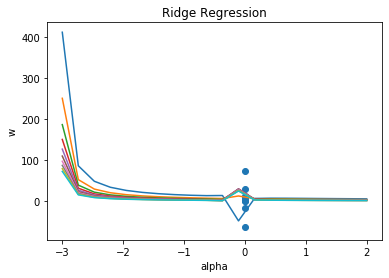

In [8]:
alphas = np.linspace(-3,2,20)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(alphas, coefs) # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(0,0,10), parameters[0]) # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel('alpha')
plt.ylabel('w')
plt.title('Ridge Regression')

使用Lasso回归

Text(0.5, 1.0, 'Lasso Regression')

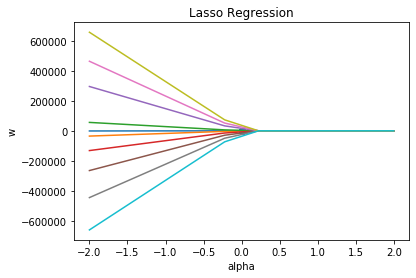

In [9]:
from sklearn.linear_model import Lasso

alphas = np.linspace(-2,2,10)
lasso_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)
    
plt.plot(alphas, lasso_coefs) # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(0,0,10), parameters[0]) # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel('alpha')
plt.ylabel('w')
plt.title('Lasso Regression')

当 alpha 取值越大时，正则项主导收敛过程，各 ww 系数趋近于 0。当 alpha 很小时，各 ww 系数波动幅度变大。